### Plot pretty functions
meshgrid is very useful to evaluate functions on a grid.

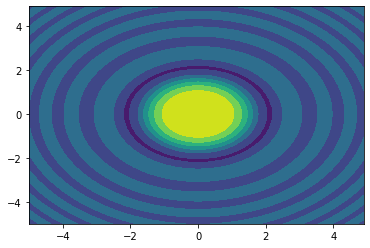

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.show()

### Univariate gaussian distribution

The univariate gaussian distribution has the form 


$$
p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}
$$


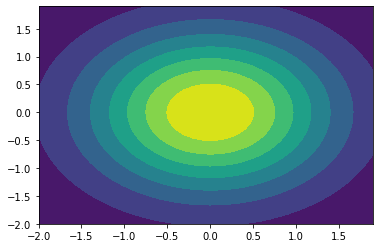

In [114]:
def uni_normal(x, mu, variance):
    return 1/(np.sqrt(2*np.pi*variance))*np.exp(-(x-mu)**2/(2*variance))

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)

z =  uni_normal(xx, 0, 1) * uni_normal(yy, 0, 1)
h = plt.contourf(x,y,z)
plt.show()

### How about some correlation
The multivariate normal with dimensionality $d$ has a joint probability density given by: 

$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$

Where $\mathbf{x}$ a random vector of size $d$, $\mathbf{\mu}$ is the mean vector, $\Sigma$ is the ([symmetric](https://en.wikipedia.org/wiki/Symmetric_matrix), [positive definite](https://en.wikipedia.org/wiki/Positive-definite_matrix)) covariance matrix (of size $d \times d$), and $\lvert\Sigma\rvert$ its [determinant](https://en.wikipedia.org/wiki/Determinant)

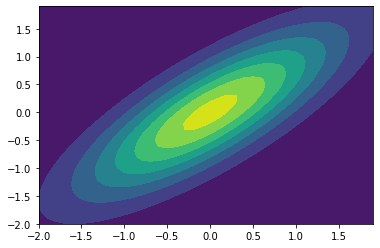

In [123]:
def multi_normal(x, mu, covariance):
    d = len(x)
    x_m = x - mu
    return (1/(np.sqrt(2*np.pi)**d * np.linalg.det(covariance))) * np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m))/2)

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.zeros((len(x), len(y)))

mean = [[0.], [0.]]
covariance = [
    [1., 0.8], 
    [0.8, 1.]]

for i in range(len(x)):
    for j in range(len(y)):
        z[i,j] = multi_normal(np.matrix([[xx[0,i]], [yy[j,0]]]), mean, covariance)
        
h = plt.contourf(x,y,z)